# Sales Analysis


#### Import Necessary Libraries

In [35]:
import os
import pandas as pd

#### Merging 12 months of sales data into a single file

In [23]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

#### Read in updated dataframe

In [37]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

#### Drop rows of NAN

In [53]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12


#### Find 'Or' and delete it

In [51]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct type

In [52]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Augment data with additional columns

### Task 2: Add month column

In [54]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12


### Task 3: Add a sales column

In [47]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95


#### Task 4: Add a city column

In [69]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA)


#### Q1. What was the best month for sales? How much was earned that month?

In [57]:
results = all_data.groupby('Month').sum()

/var/folders/xr/2m3swjv95b9gncrg2h666s3w0000gn/T/ipykernel_7262/675579350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


range(1, 13)


/var/folders/xr/2m3swjv95b9gncrg2h666s3w0000gn/T/ipykernel_7262/680496127.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])


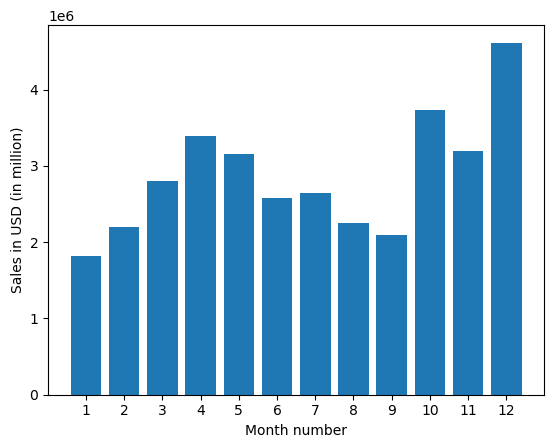

In [83]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD (in million)')
plt.xlabel('Month number')
plt.show()

#### Q2. What city has the highest number of sales?

In [70]:
results = all_data.groupby('City').sum()
results

/var/folders/xr/2m3swjv95b9gncrg2h666s3w0000gn/T/ipykernel_7262/2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602.0,2779908.20,2795498.58,104794
Austin (TX),11153.0,1809873.61,1819581.75,69829
Boston (MA),22528.0,3637409.77,3661642.01,141112
Dallas (TX),16730.0,2752627.82,2767975.40,104620
Los Angeles (CA),33289.0,5421435.23,5452570.80,208325
New York City (NY),27932.0,4635370.83,4664317.43,175741
Portland (ME),2750.0,447189.25,449758.27,17144
Portland (OR),11303.0,1860558.22,1870732.34,70621
San Francisco (CA),50239.0,8211461.74,8262203.91,315520


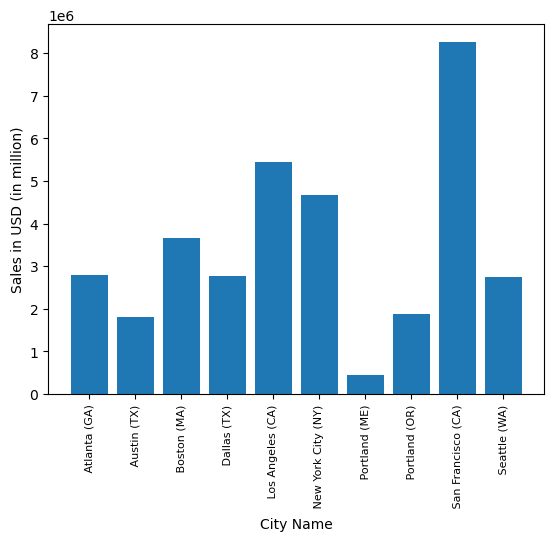

In [84]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD (in million)')
plt.xlabel('City Name')
plt.show()

#### Q3. What time should we display ads to maximize likelihood of customer's buying product?

In [86]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [90]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY),0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY),7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY),18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA),12,38


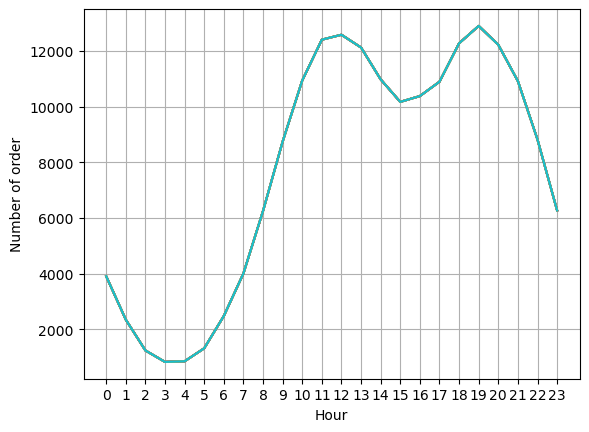

In [96]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

# all_data.groupby(['Hour']).count()

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of order')
plt.grid()

plt.show()

# Recom -> 12.00 PM and 19.00

#### Q4. What products are most often sold together?

In [103]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

/var/folders/xr/2m3swjv95b9gncrg2h666s3w0000gn/T/ipykernel_7262/160653656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute,Grouped
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",600.00,12,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.95,12,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",99.99,12,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.99,12,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",400.00,12,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [106]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


#### Q5. What product sold the most? Why?

In [107]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY),0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY),7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY),18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA),12,38


/var/folders/xr/2m3swjv95b9gncrg2h666s3w0000gn/T/ipykernel_7262/433234782.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


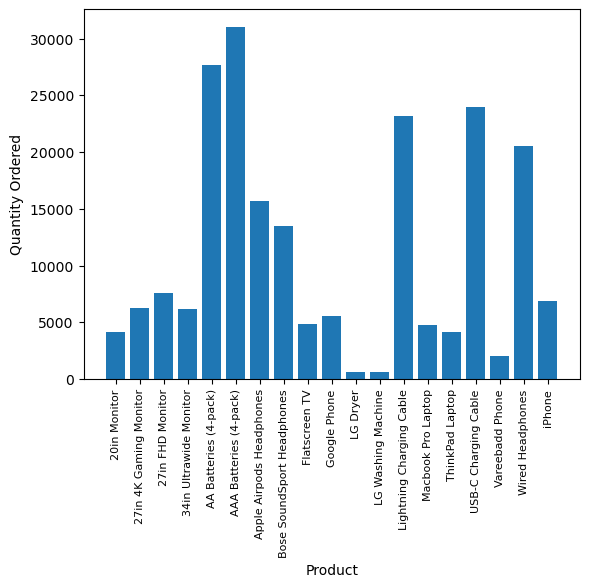

In [112]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

/var/folders/xr/2m3swjv95b9gncrg2h666s3w0000gn/T/ipykernel_7262/3407288281.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/var/folders/xr/2m3swjv95b9gncrg2h666s3w0000gn/T/ipykernel_7262/3407288281.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


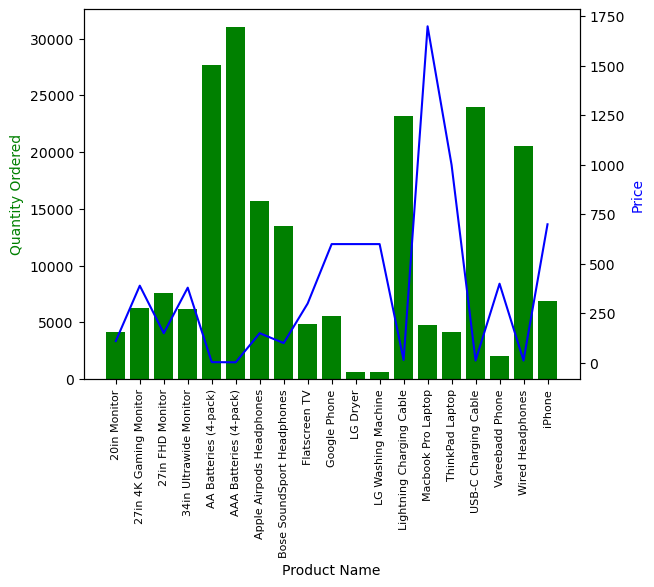

In [115]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()